Number of snapshots: 50000
Time of first and last snapshot: 0.0, 49999000.0
---------------------------------
REBOUND version:     	3.25.1
REBOUND built on:    	Jun  9 2023 13:16:03
Number of particles: 	9
Selected integrator: 	mercurius
Simulation time:     	4.9999000014664456e+07
Current timestep:    	0.024608
---------------------------------
<rebound.particle.Particle object at 0x7f803f20fb40, m=0.9999999999950272 x=-0.004188796856732009 y=0.0032742780429191117 z=0.00012591887542377206 vx=-0.0006156223397952503 vy=-0.0020748825370330583 vz=4.8578493711089746e-05>
<rebound.particle.Particle object at 0x7f803f20f540, m=2.447838287784771e-06 x=0.5810606912525279 y=0.40949649030002205 z=-0.0020498857407836852 vx=-4.436450278695177 vy=6.043489133221168 vz=-0.15212955300357528>
<rebound.particle.Particle object at 0x7f803f20fb40, m=3.0404326489511185e-06 x=-0.4738948677007706 y=0.8326367861941902 z=0.009187680577571439 vx=-5.671001612957812 vy=-3.345280219435169 vz=0.15912367112691933>
<

/opt/anaconda3/envs/su23/lib/python3.9/site-packages/rebound/simulationarchive.py:146: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)


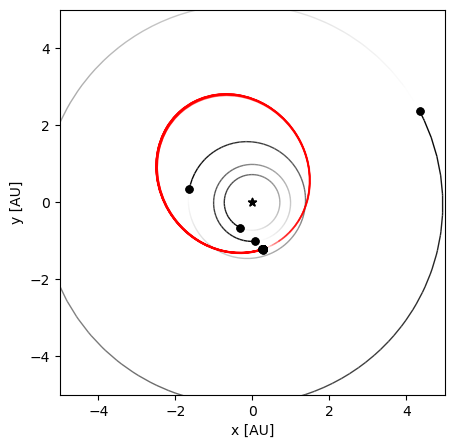

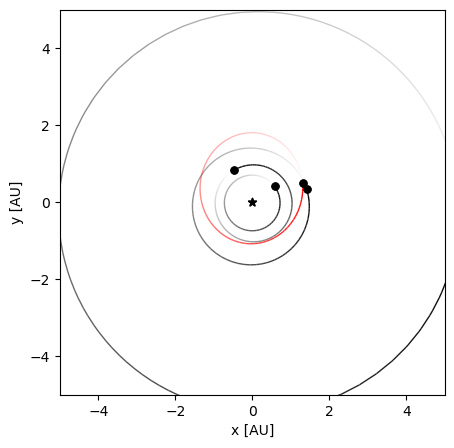

In [4]:
import rebound
from rebound import hash as h

import numpy as np
import matplotlib.pyplot as plt

sa = rebound.SimulationArchive("archive.bin")
print("Number of snapshots: %d" % len(sa))
print("Time of first and last snapshot: %.1f, %.1f" % (sa.tmin, sa.tmax))
N_pl = 8
N_tp = 20

sim = sa[0]
rebound.OrbitPlot(sim, unitlabel = "[AU]", color = (N_pl-1)*["black"] + N_tp*["red"], xlim = [-5,5], ylim = [-5,5])

sim = sa[-1]
rebound.OrbitPlot(sim, unitlabel = "[AU]", color = (N_pl-1)*["black"] + N_tp*["red"], xlim = [-5,5], ylim = [-5,5])
sim.status()

orbits = sim.calculate_orbits()
for orbit in orbits:
    print(orbit)
    
##########################

        



Text(0.5, 1.0, 'Particle115')

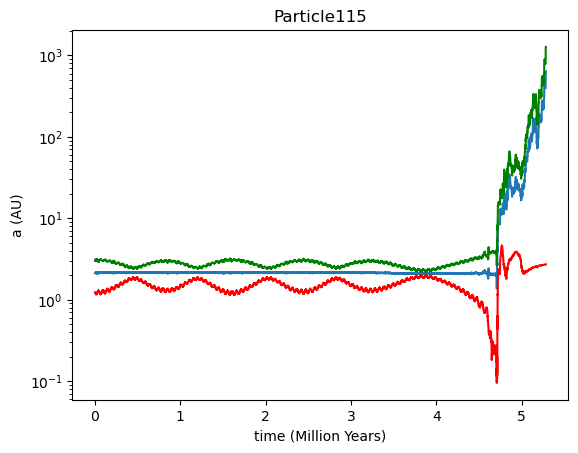

In [5]:
import rebound
from rebound import hash as h

import numpy as np
import matplotlib.pyplot as plt


t = np.zeros(len(sa))
a = np.zeros(len(sa))
e = np.zeros(len(sa))

pid = 115
for i, sim in enumerate(sa):
    t[i] = sim.t / 1e6
    try:
        a[i] = sim.particles[h(pid)].a
        e[i] = sim.particles[h(pid)].e
    except rebound.ParticleNotFound:
        a = a[:i]
        e = e[:i]
        t = t[:i]
        break
q = a*(1-e)
Q = a*(1+e)
plt.plot(t,a)
plt.plot(t, q, 'red')
plt.plot(t, Q, 'green')
plt.xlabel("time (Million Years)")
plt.ylabel("a (AU)")
plt.yscale("log")
plt.title("Particle{0}".format(pid))

<ErrorbarContainer object of 3 artists>

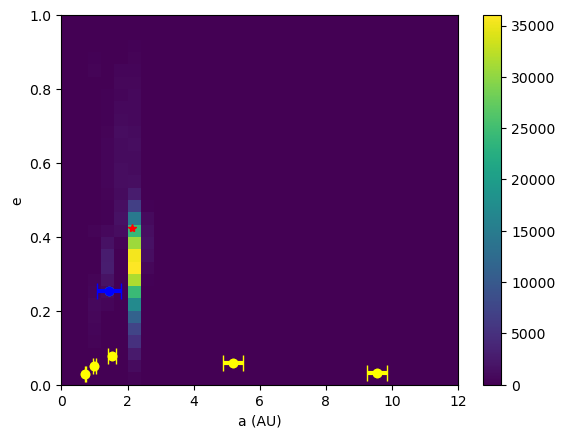

In [11]:
a_all = []
e_all = []

for i, sim in enumerate(sa):
    for pid in range(100, 100 + N_tp):
        try:
            a_all.append(sim.particles[h(pid)].a)
            e_all.append(sim.particles[h(pid)].e)
        except rebound.ParticleNotFound:
            continue
            
amin, amax = 0, 12
emin, emax = 0, 1
h2d,xedge, yedge, im = plt.hist2d(a_all, e_all, range = [[amin, amax], [emin, emax]], bins = (30, 30))
plt.xlabel("a (AU)")
plt.ylabel("e")
plt.colorbar()
a_init = 2.13
e_init = 0.423
plt.plot(a_init, e_init, "*", color = "r")
sim = sa[-1]

a_tp = []
e_tp = []
ae_tp = []

for pid in range(100, 100+N_tp):
    try:
        a_tp.append(sim.particles[h(pid)].a)
        e_tp.append(sim.particles[h(pid)].e)
        ae_tp.append((sim.particles[h(pid)].e) * (sim.particles[h(pid)].a))
    except:
        continue
plt.plot(a_tp, e_tp, "co")
plt.errorbar(a_tp, e_tp,xerr = [ae_tp], marker = 'o', lw = 0, color = 'blue', elinewidth = 3,  capsize = 6)

a_pl = []
e_pl = []
ae_pl = []
for id in range(1, N_pl):
    a_pl.append(sim.particles[id].a)
    e_pl.append(sim.particles[id].e)
    ae_pl.append((sim.particles[id].a) * (sim.particles[id].e))
plt.plot(a_pl, e_pl, "yo")
plt.errorbar(a_pl, e_pl,xerr = [ae_pl], marker = 'o', lw = 0, color = 'yellow', elinewidth = 3,  capsize = 6)

/opt/anaconda3/envs/su23/lib/python3.9/site-packages/rebound/simulationarchive.py:146: RuntimeWarning: You have to reset function pointers after creating a reb_simulation struct with a binary file.
  warnings.warn(message, RuntimeWarning)
/opt/anaconda3/envs/su23/lib/python3.9/site-packages/rebound/plotting.py:105: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  self.fig = plt.figure(figsize=figsize)


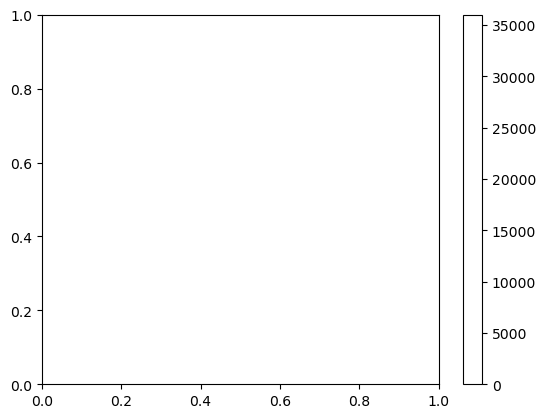

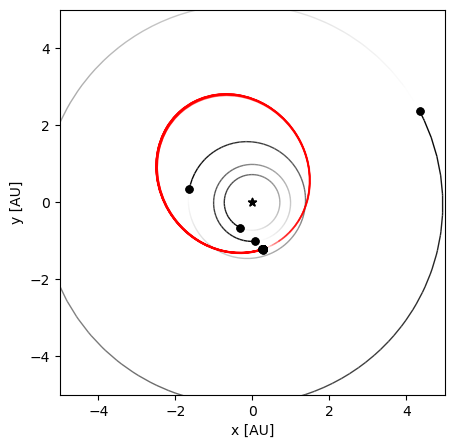

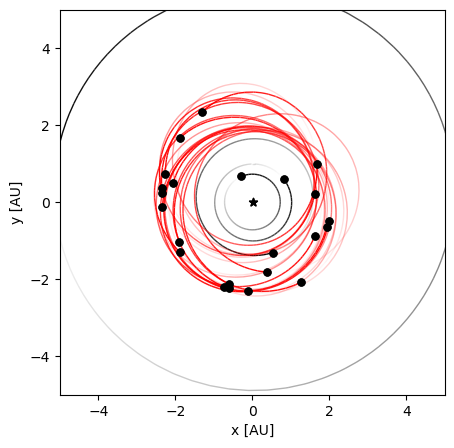

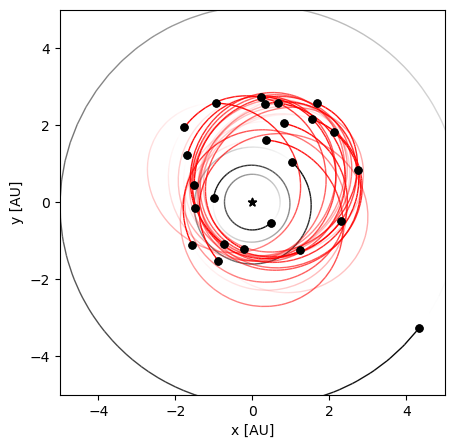

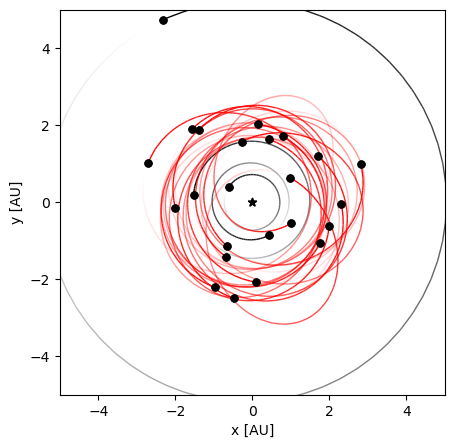

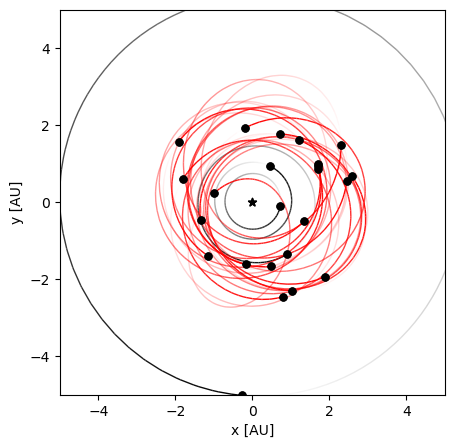

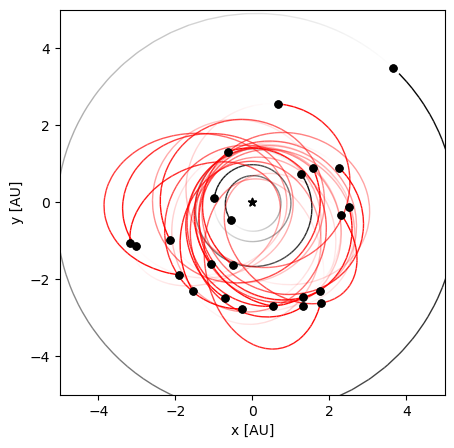

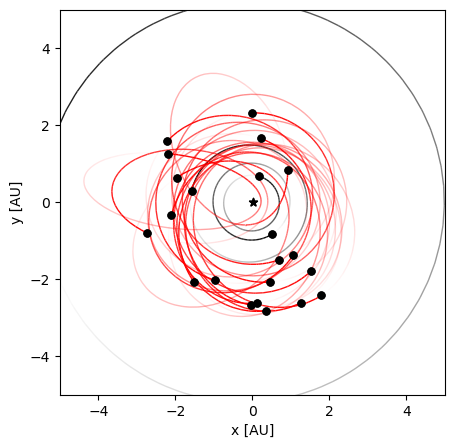

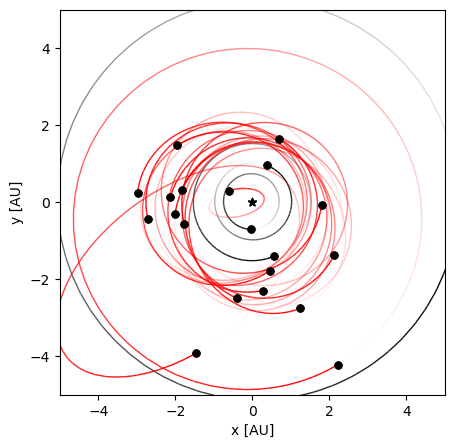

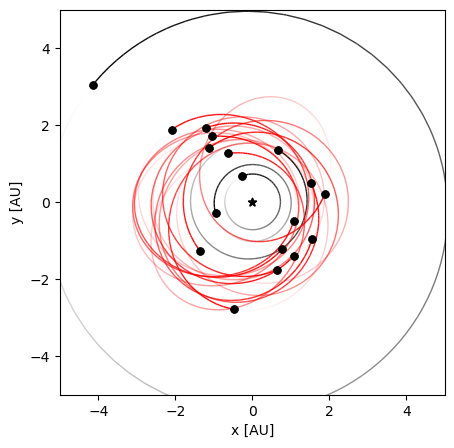

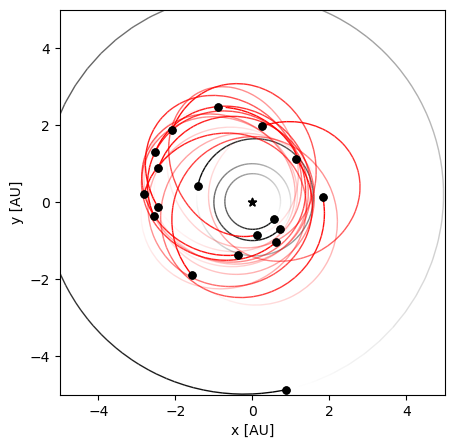

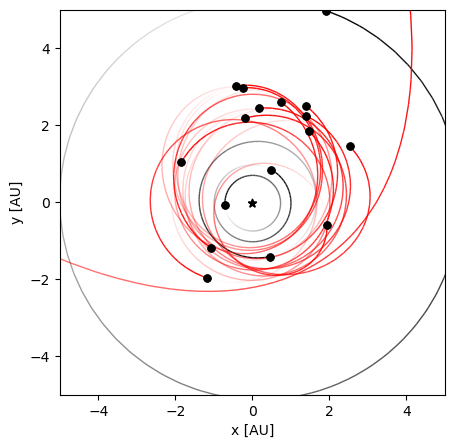

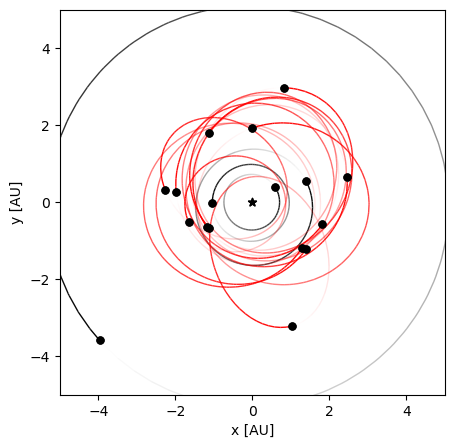

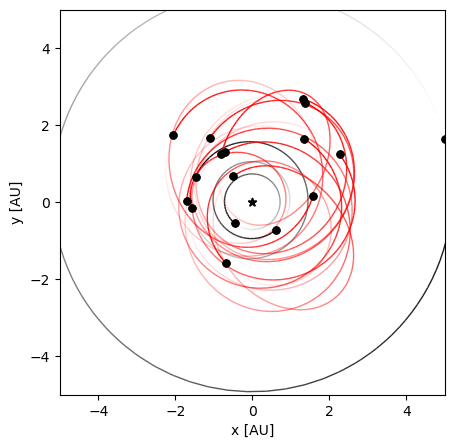

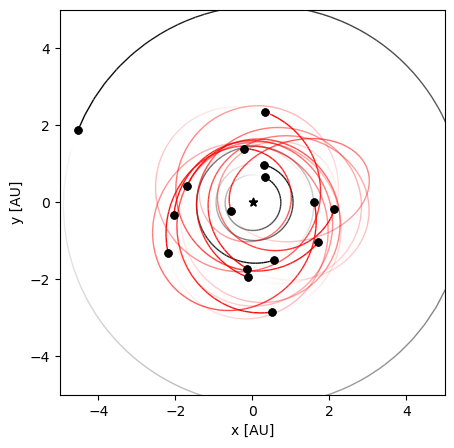

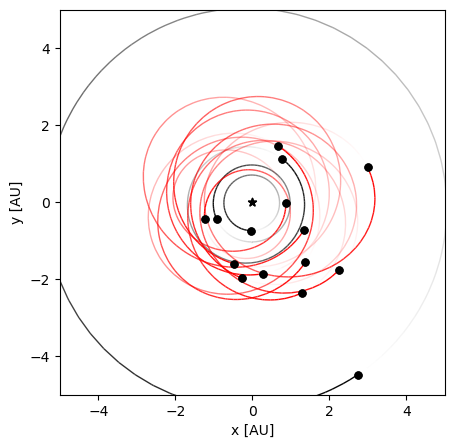

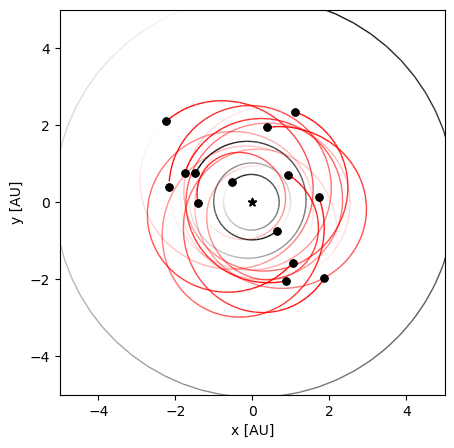

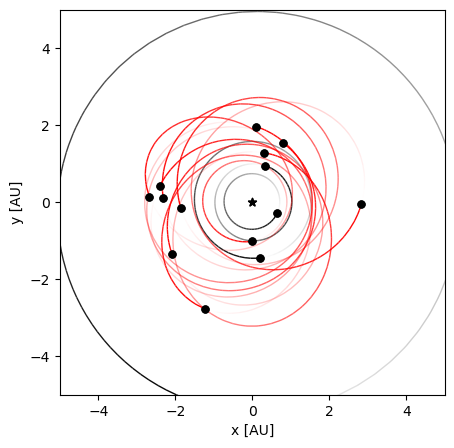

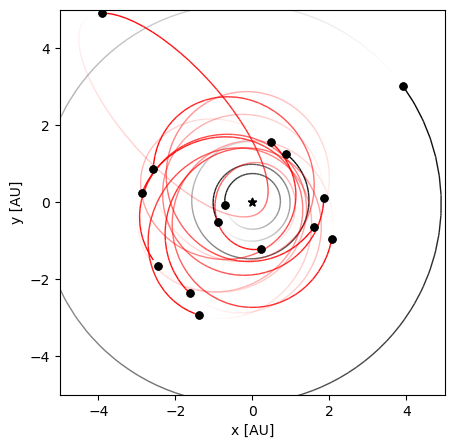

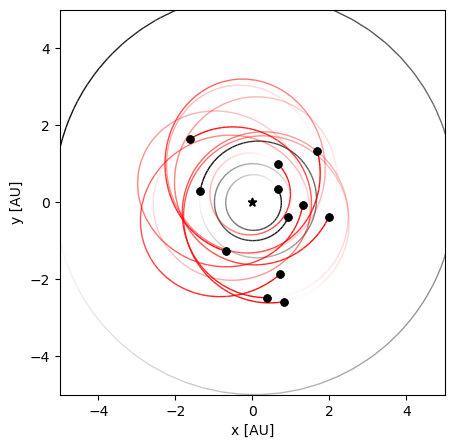

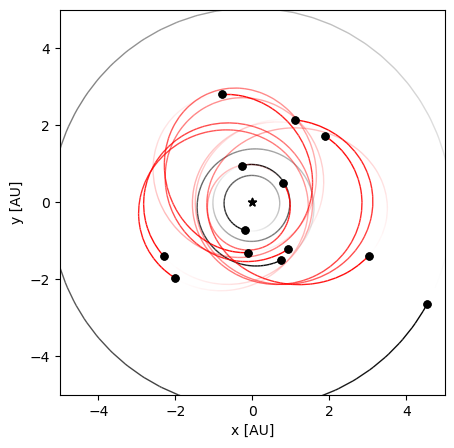

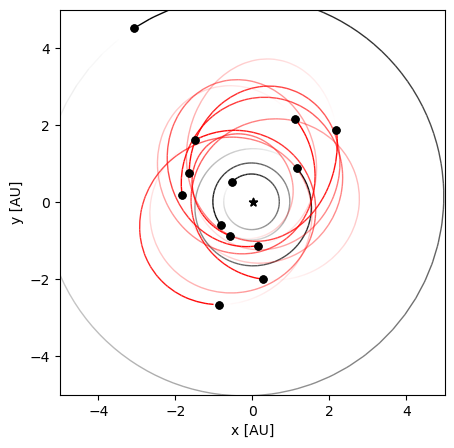

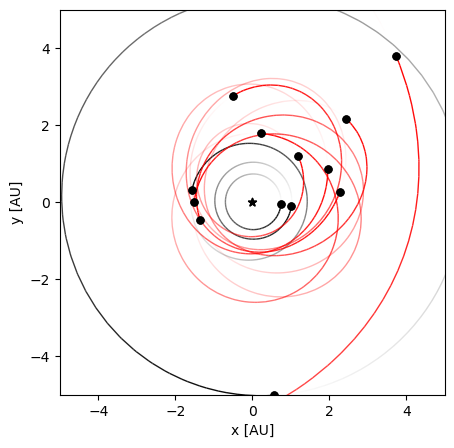

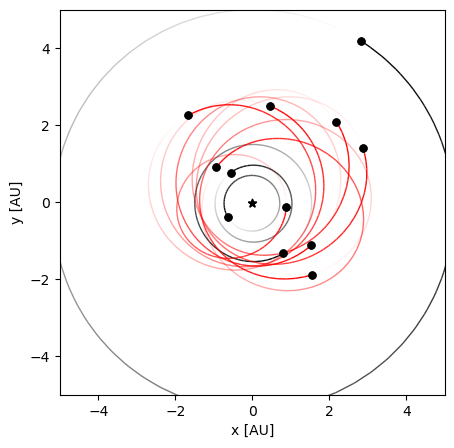

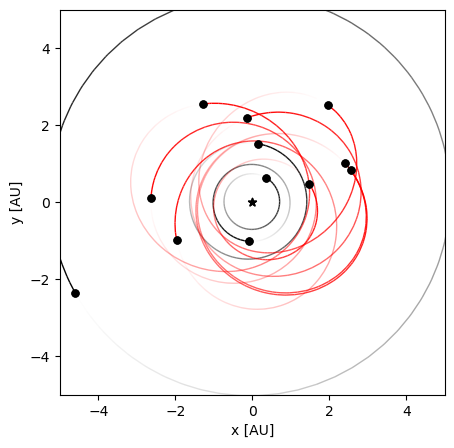

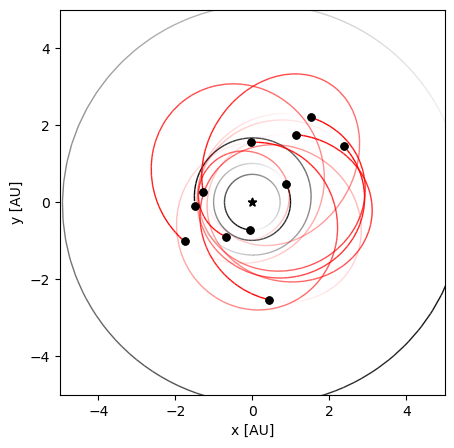

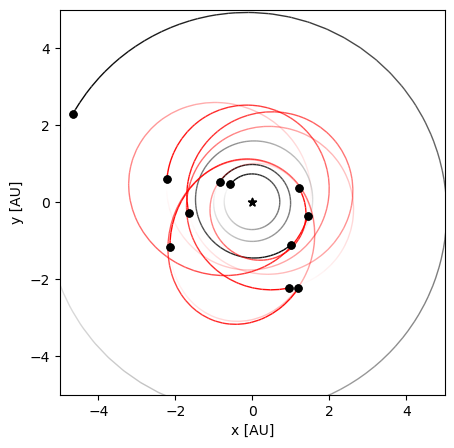

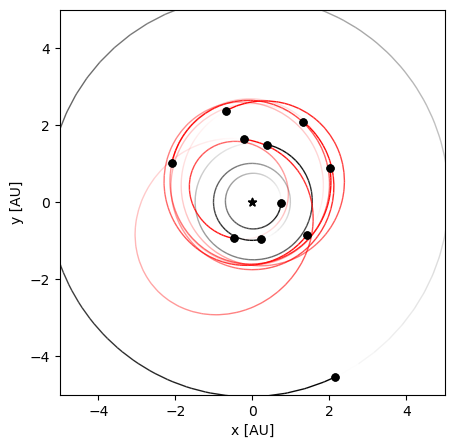

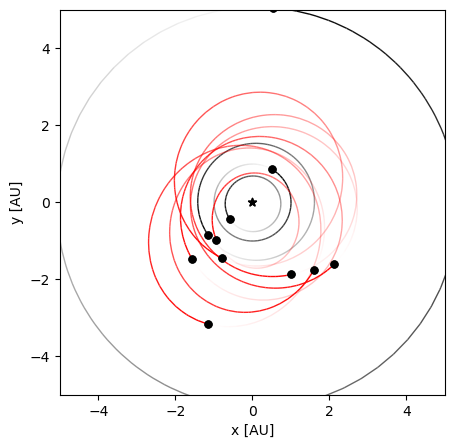

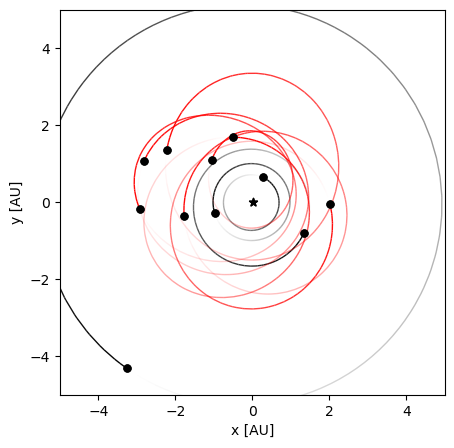

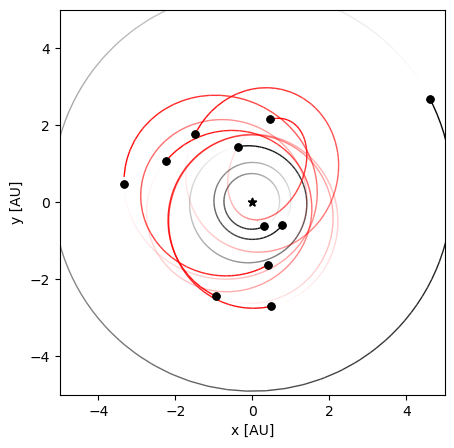

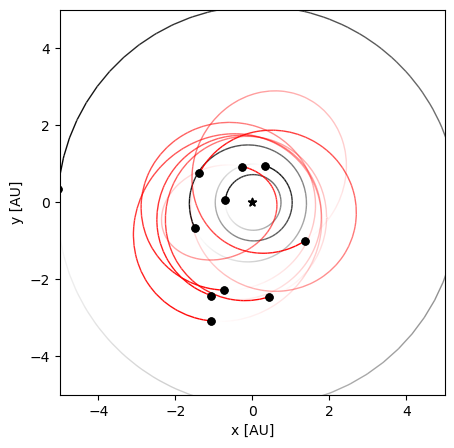

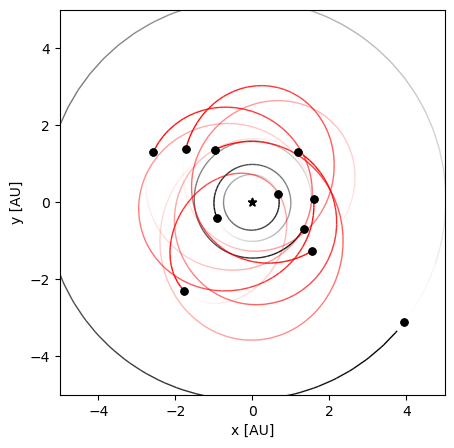

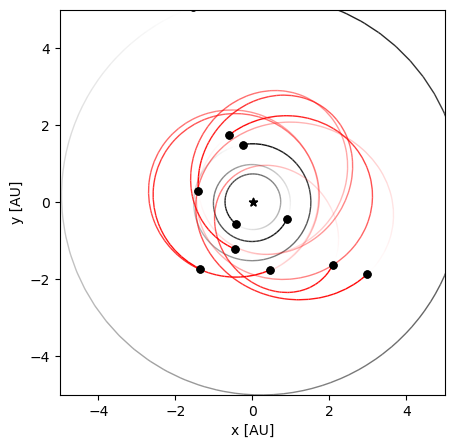

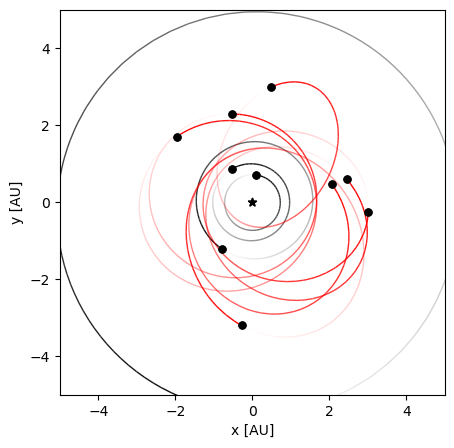

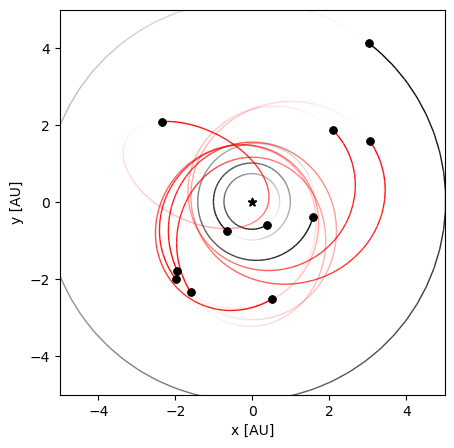

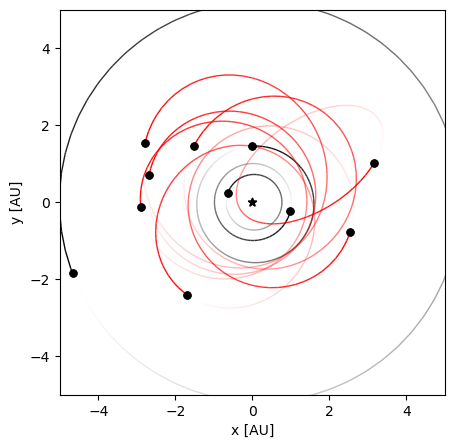

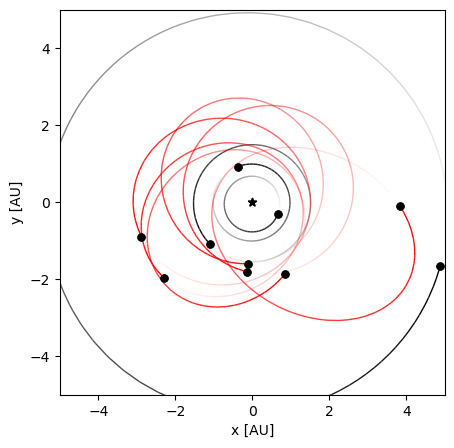

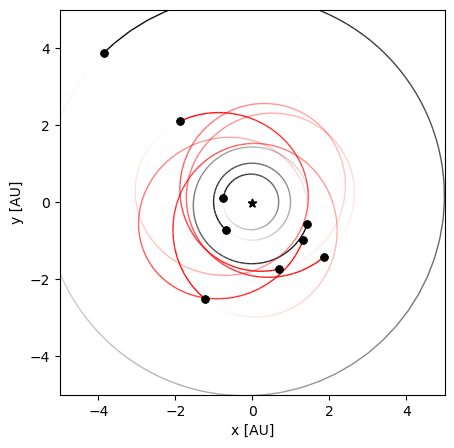

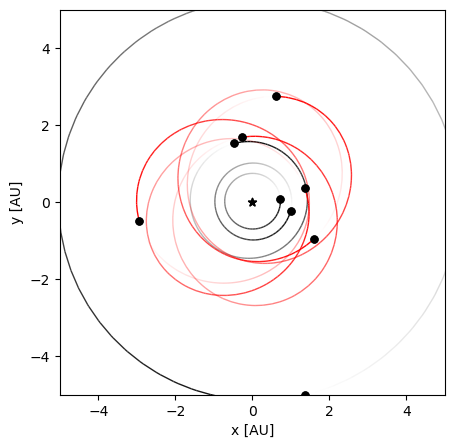

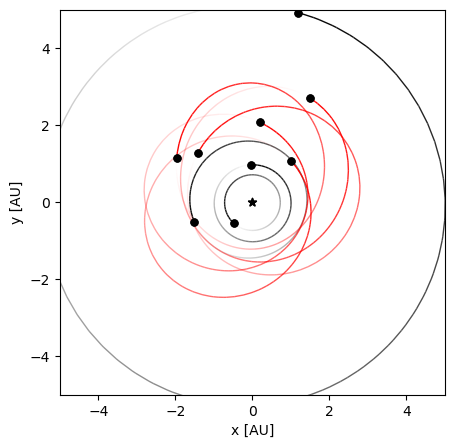

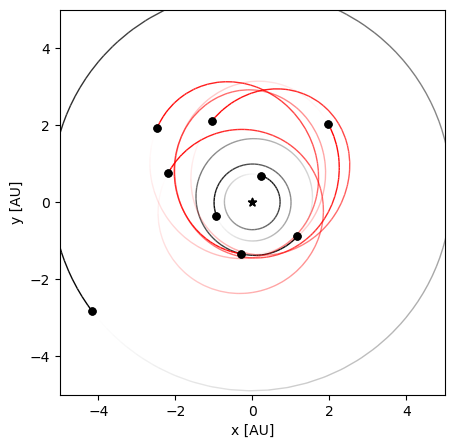

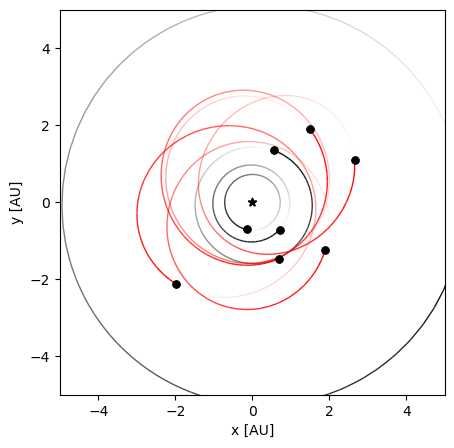

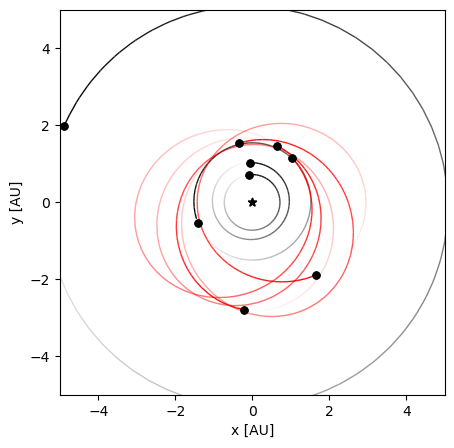

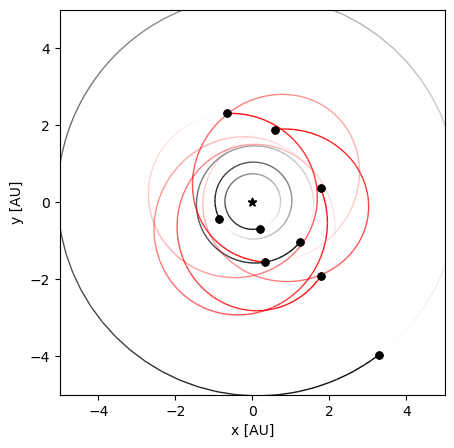

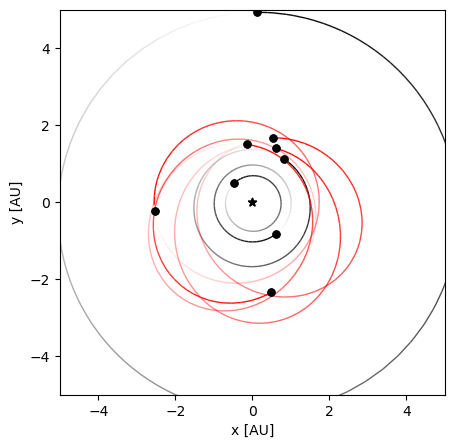

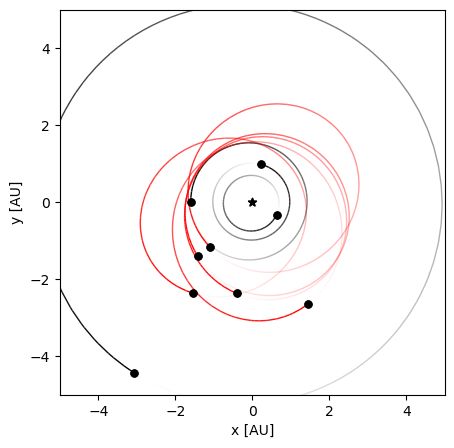

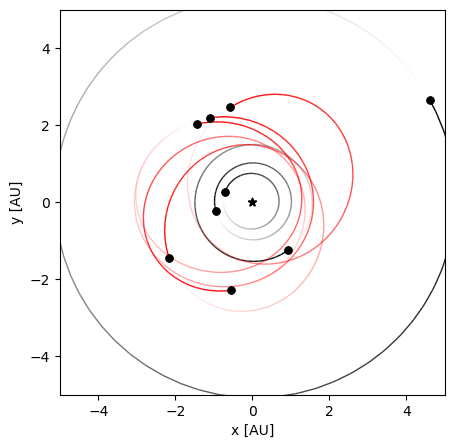

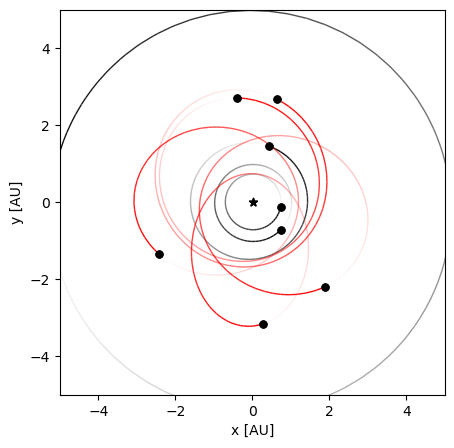

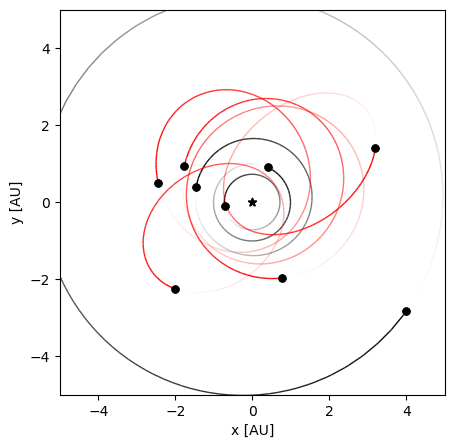

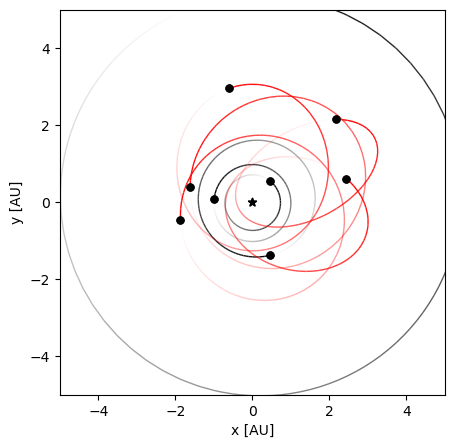

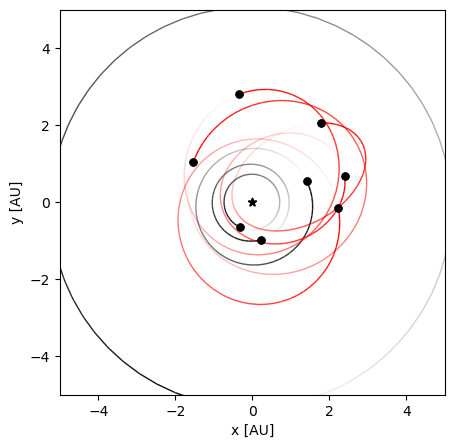

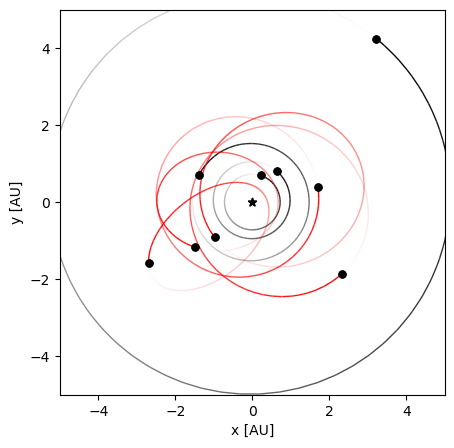

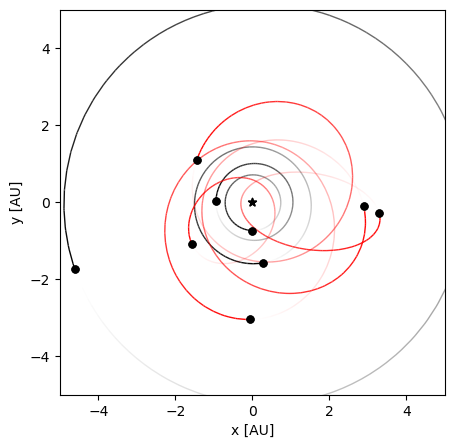

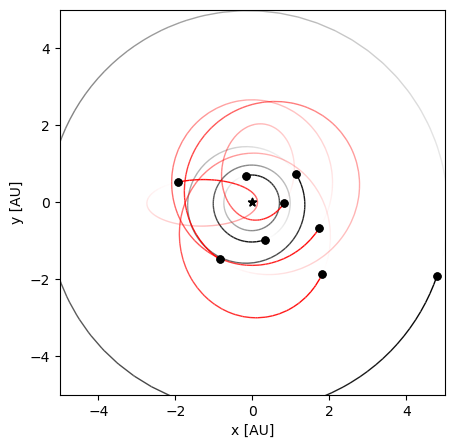

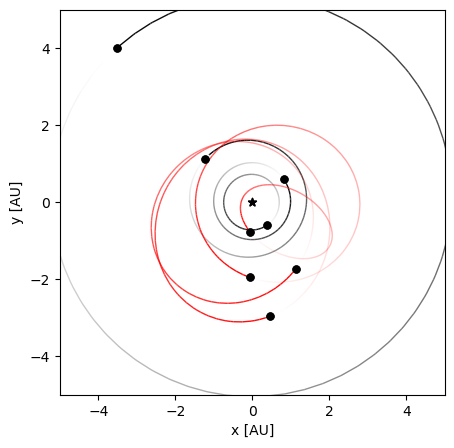

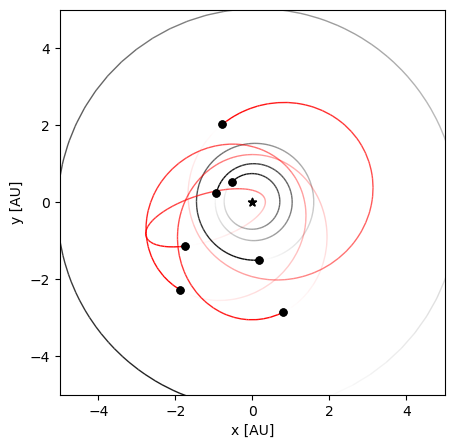

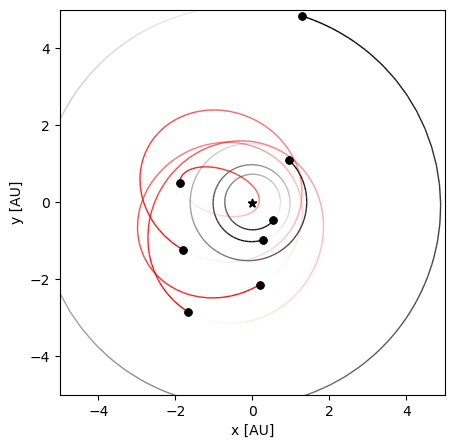

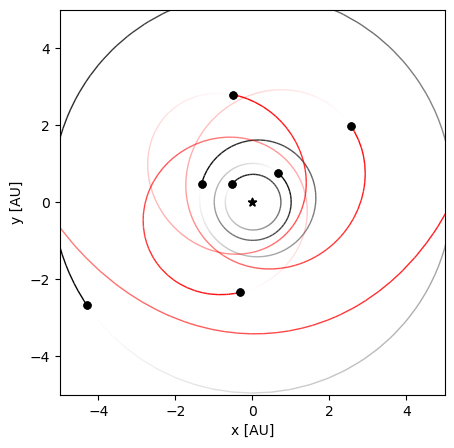

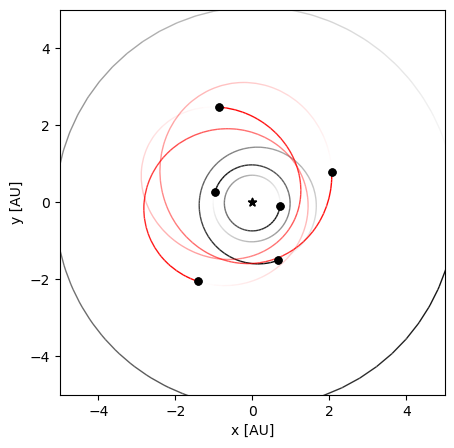

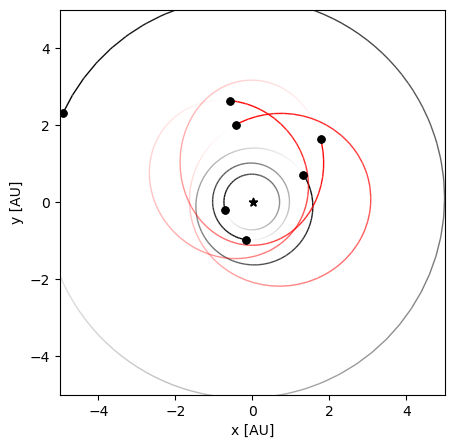

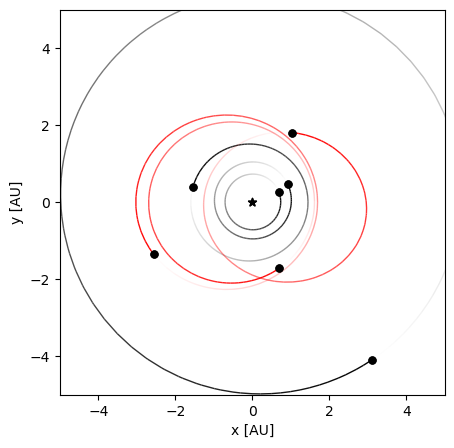

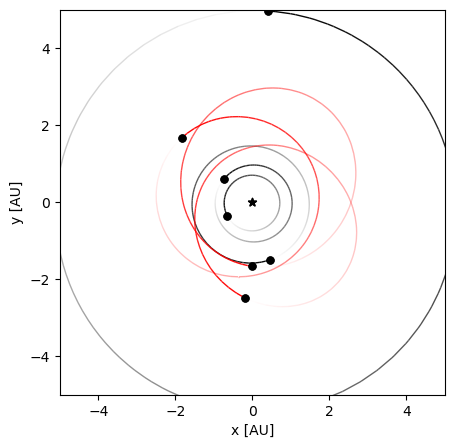

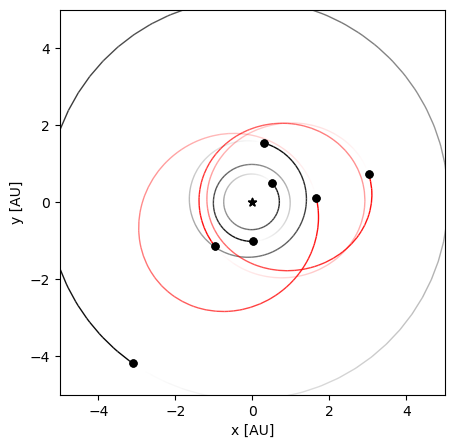

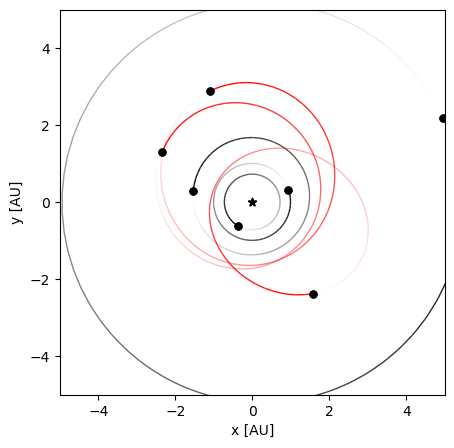

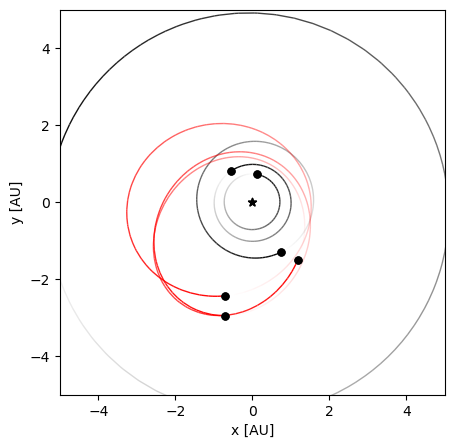

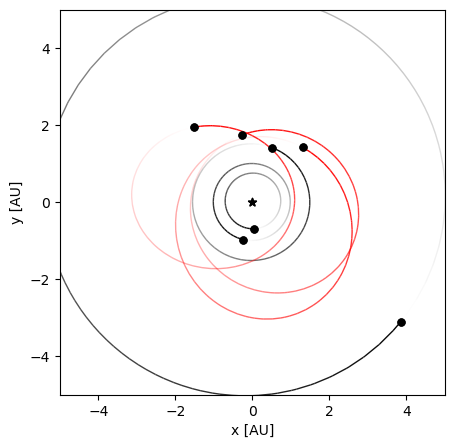

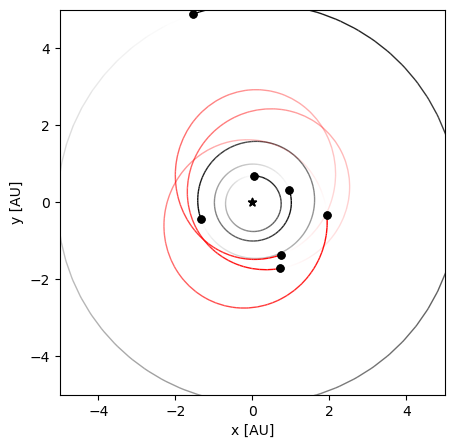

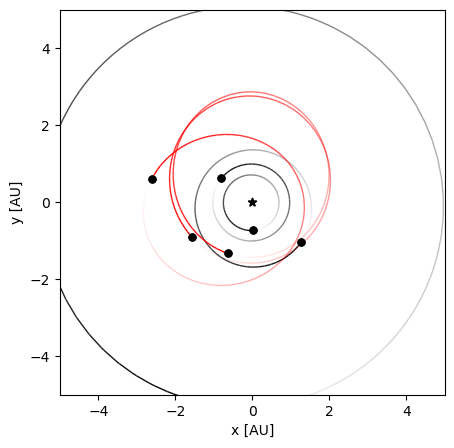

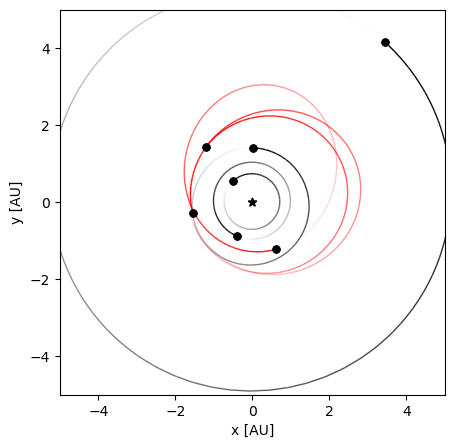

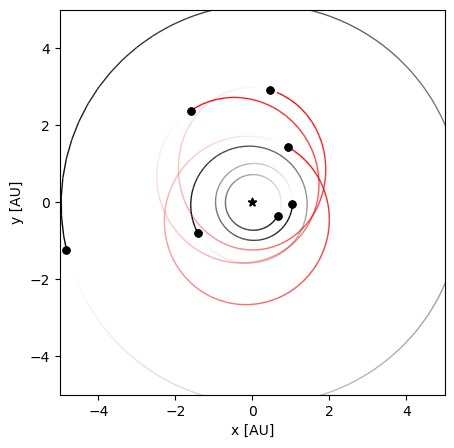

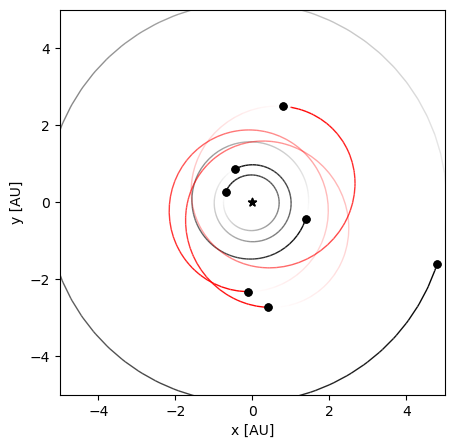

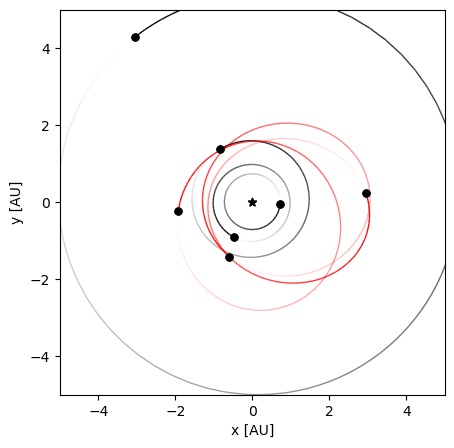

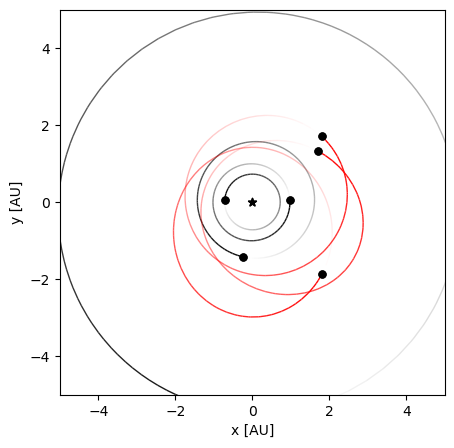

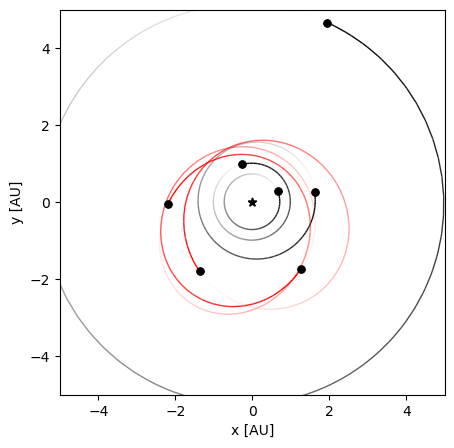

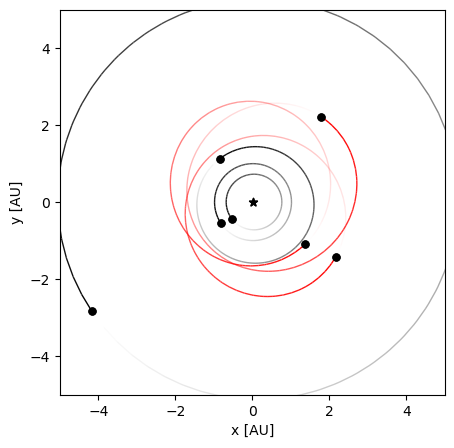

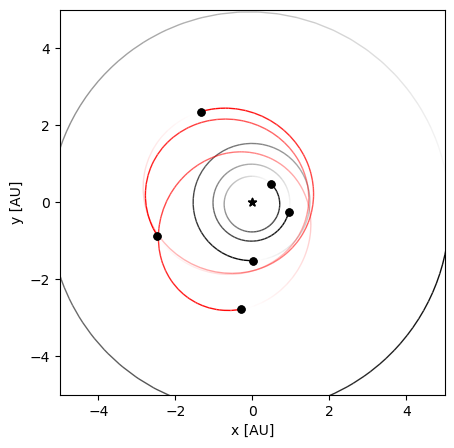

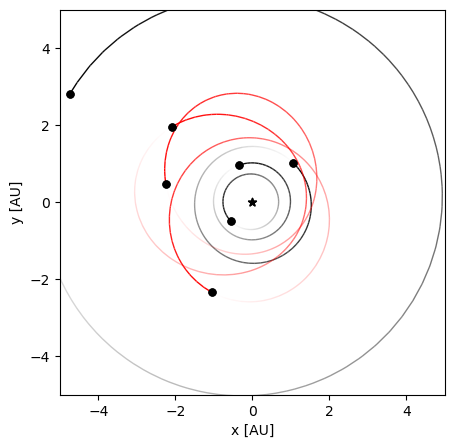

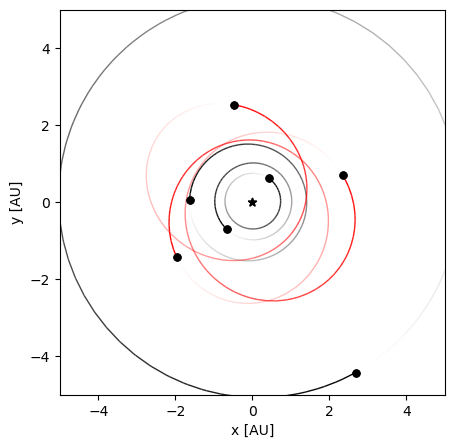

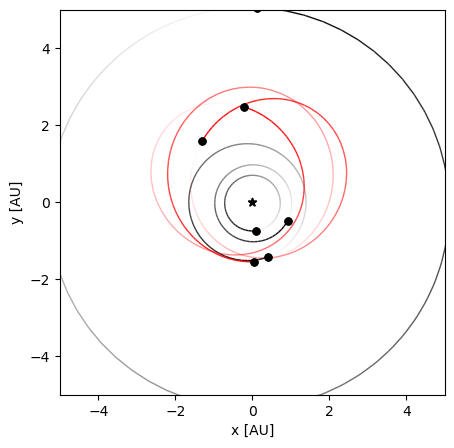

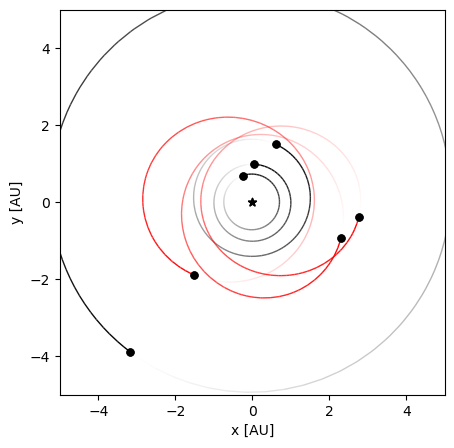

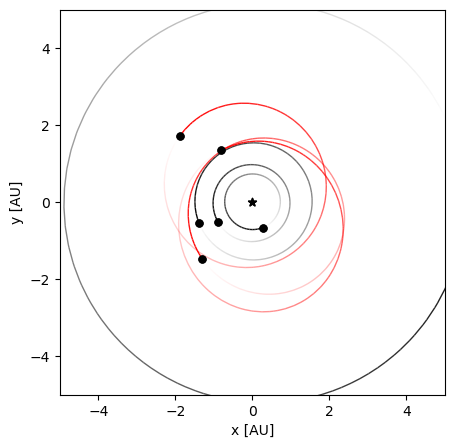

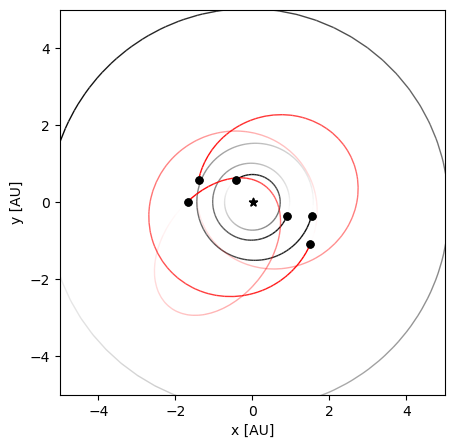

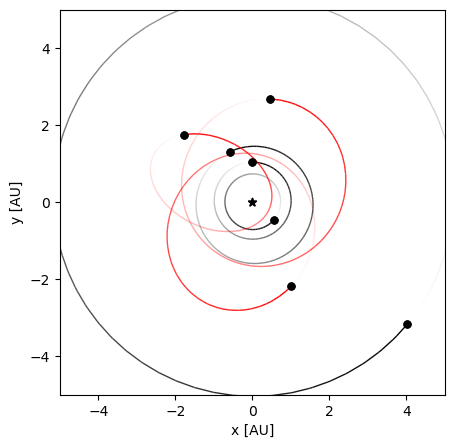

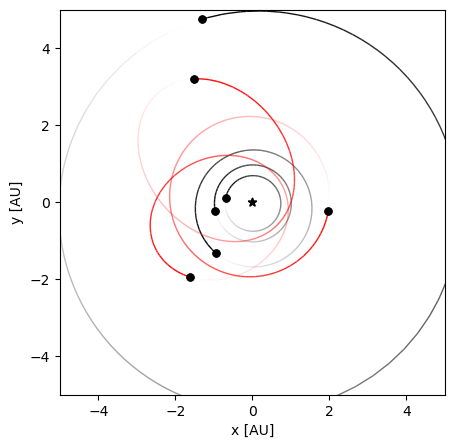

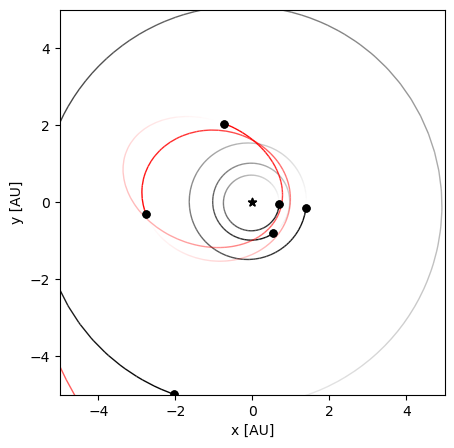

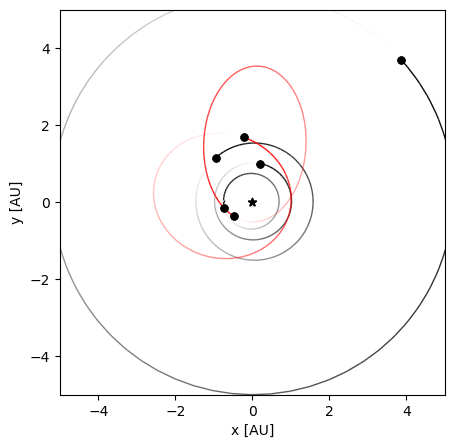

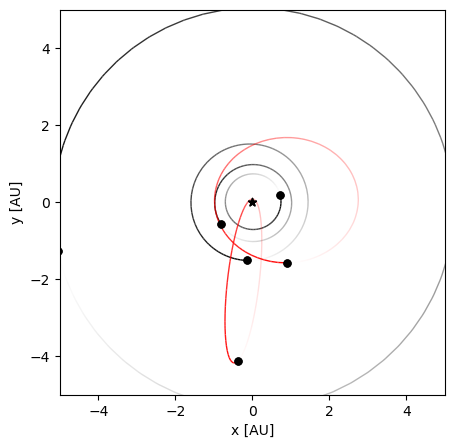

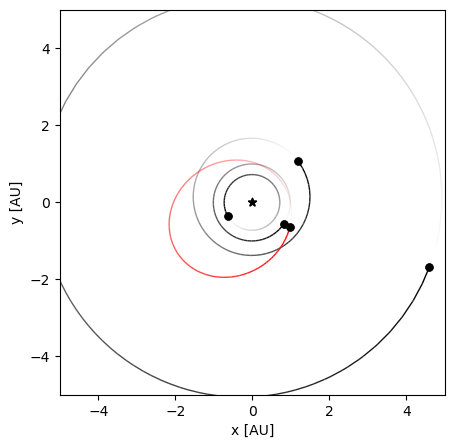

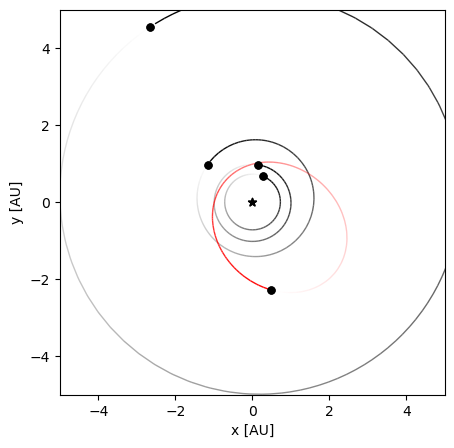

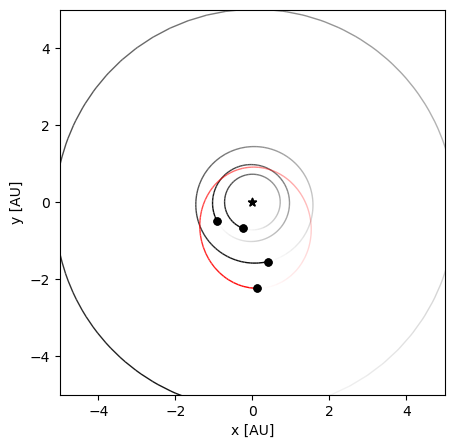

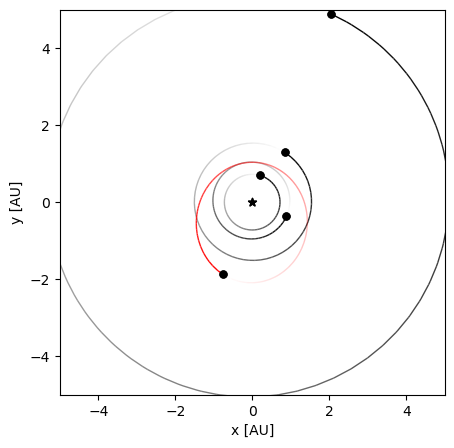

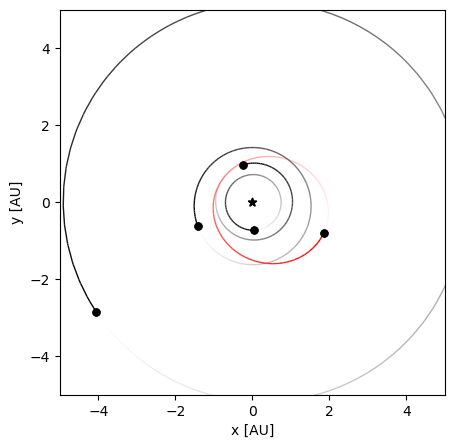

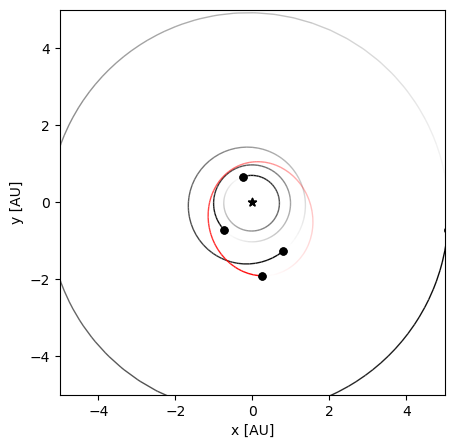

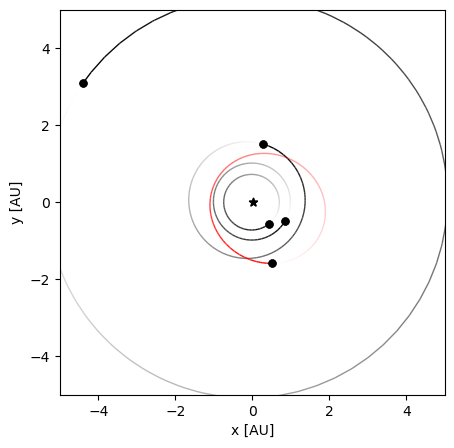

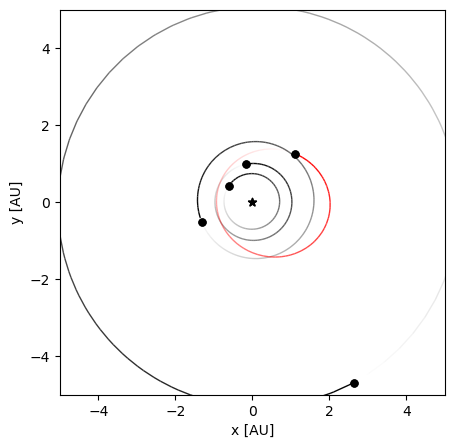

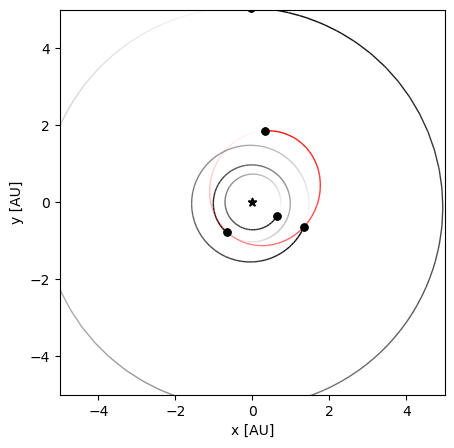

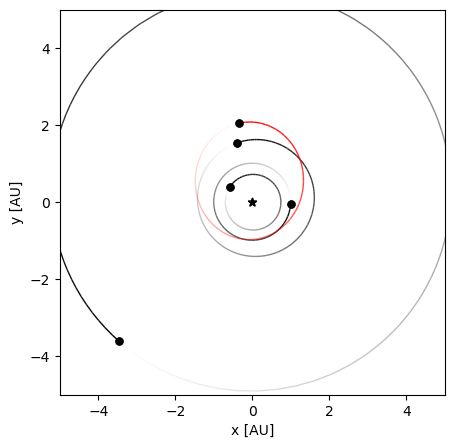

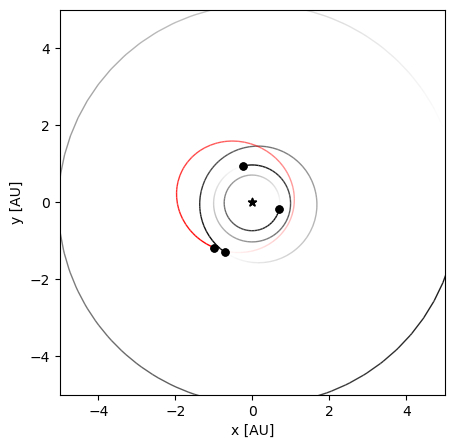

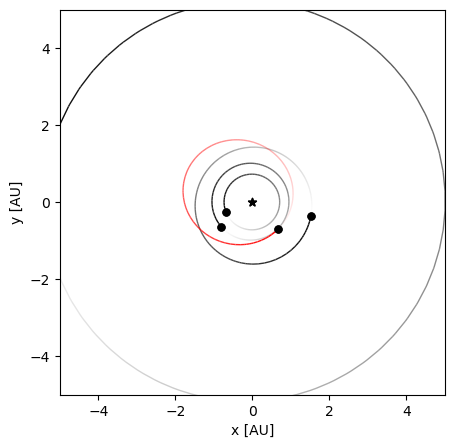

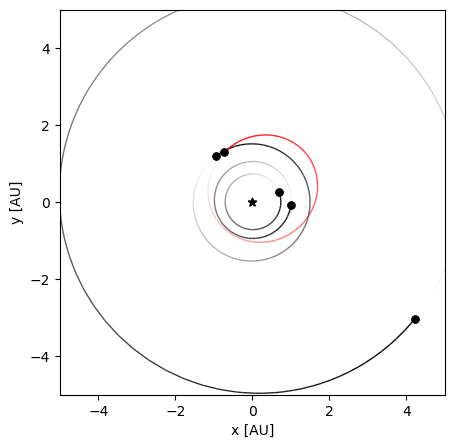

In [25]:

from celluloid import Camera
from IPython.display import HTML

fig, ax = plt.subplots()
cbar = fig.colorbar(im, ax = ax)
cax = cbar.ax
camera = Camera(fig)
for i, sim in enumerate(sa):
    if i % 500:
        continue
    sim = sa[i]
    rebound.OrbitPlot(sim, unitlabel = "[AU]", color = (N_pl-1)*["black"] + N_tp*["red"], xlim = [-5,5], ylim = [-5,5])
    plt.savefig('hoobly_{0}.png'.format(i))
 
    camera.snap()
animation = camera.animate()
HTML(animation.to_html5_video())
animation.save("my_animation.gif")